In [193]:
from skimage.filters import gaussian
from skimage.feature import Cascade
import matplotlib.pyplot as plt
from skimage import data
trained_file  = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)
image = data.astronaut()

In [194]:
detected = detector.detect_multi_scale(img = image , step_ratio = 1 , scale_factor = 1.2 , min_size = (50,50) , max_size  = (200,200))

In [195]:
print(detected)

[{'r': 66, 'c': 174, 'width': 96, 'height': 96}]


In [196]:
def getFace(d):
    x , y = d['r'] , d['c']
    width , height = d['r'] + d['width'] , d['c'] + d['height']
    face = image[x:width , y:height]
    return face

In [197]:
for d in detected:
    face = getFace(d)
    gaussian_face = gaussian(face , multichannel = True , sigma = 10)

In [198]:
def mergblurryimage(original , gaussian_image):
    x , y = d['r'] , d['c']
    width , height = d['r'] + d['width'] , d['c'] + d['height']
    original[x:width , y:height] = gaussian_image
    return original

In [199]:
def show_blur_face(result , detected , title = "Blurred Image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis("off")

In [200]:
resulting_image = mergblurryimage(image , gaussian_face)

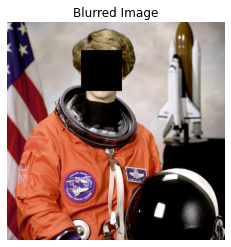

In [201]:
show_blur_face(resulting_image , detected)